# １．例外

Pythonではプログラムの実行時にプログラムの誤動作を防止したり、異常状態から復旧するための仕組みとして例外がある。

本章では例外について紹介する。

## １－１．例外の基本

### 例外発生時の動作

例外が発生した際の動作を確認する。

例として、0による割り算が発生した場合の動作を確認する。

In [ ]:
a = int(input(">"))
b = int(input(">"))

ans = a / b

print('完了')

>100
>0


ZeroDivisionError: ignored

bに0を代入してプログラムを実行すると、ZeroDivisionErrorという例外が発生して「完了」が表示されずにプログラムが停止する。

### 例外の補足

**try-except**

例外発生時にプログラムが停止した。

プログラムの停止を防ぐには下記のようにtry-except文で例外を捕捉する。

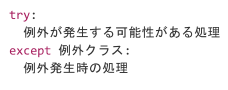

例えば、下記のように記載することで例外を捕捉することができる。

In [ ]:
a = int(input(">"))
b = int(input(">"))

try:
  ans = a/ b
except ZeroDivisionError:
  print("0による割り算が発生しました。")

print("完了")

>100
>0
0による割り算が発生しました。
完了


bに0を代入してプログラムを実行すると、**完了**が表示される

**try-except-else**

try-except-else文で例外が発生しなかった場合の処理を記載することもできる

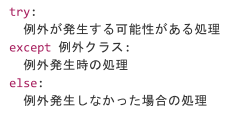

In [ ]:
a = int(input(">"))
b = int(input(">"))

try:
  ans = a / b
except ZeroDivisionError:
  print("0による割り算が発生しました。")
else:
  print("0による割り算が発生しませんでした。")

print("完了")

>0
>50
0による割り算が発生しませんでした。
完了


**try-except-finally**

try-except-finally文で例外発生の有無に関わらず最後に行う処理を記載することもできる。

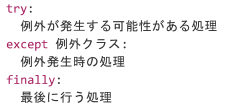

In [ ]:
a = int(input(">"))
b = int(input(">"))

try:
  ans = a / b
except ZeroDivisionError:
  print("0による割り算が発生しました。")
else:
  print("0による割り算が発生しませんでした。")
finally:
  print("処理が完了しました。")

print("完了")

>0
>100
0による割り算が発生しませんでした。
処理が完了しました。
完了


**try-except 例外 as 変数名**

try-except 例外 as 変数名 とすることで発生した例外を取得することができる。

In [ ]:
a = int(input(">"))
b = int(input(">"))

try:
  ans = a / b
except ZeroDivisionError as ex:
  # 発生した例外はexに格納される
  print(type(ex))
  print(ex)

print("完了")

>100
>0
<class 'ZeroDivisionError'>
division by zero
完了


### 関数で発生した例外の捕捉

関数呼び出し先で発生した例外は、呼び出し元で捕捉することができる。

In [ ]:
def dev(a, b):
  return a / b

a = int(input(">"))
b = int(input(">"))

try:
  # 関数devでZeroDivisionErrorが発生した場合、呼び出し元で捕捉できる
  a = dev(a, b)
except ZeroDivisionError:
  print("0による割り算が発生しました。")

print("完了")

>100
>0
0による割り算が発生しました。
完了


## １－２．組み込み例外

PythonではZeroDivisionErrorのようなPythonに組み込まれている標準の例外がある。

このような例外のことを組み込み例外と呼ぶ。

組み込み例外の中でよく利用される組み込み例外の一覧を示す。

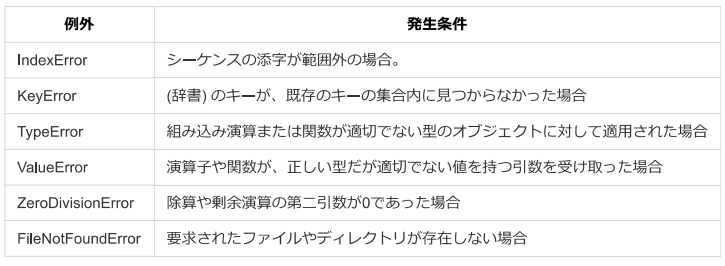

下記に組み込み例外発生の例を示す。

In [ ]:
# IndexError
a = [1, 2]
try:
  print(a[2])
except IndexError:
  print('IndexError')

  # KeyError
  a = {'a': 'a'}
  try:
    print(a[2])
  except KeyError:
    print("KeyError")

  # TypeError
  try:
    print('100' + 10)
  except TypeError:
    print("TypeError")

  # ValueError
  try:
    print(float('number'))
  except ValueError:
    print('ValueError')

# ZeroDivisionError
try:
  a = 0 / 0
except ZeroDivisionError:
  print("ZeroDivisionError")

# FileNotFoundError
try:
  with open("not-found-file", "r") as f:
    a = f.readlines()
except FileNotFoundError:
  print("FileNotFoundError")

IndexError
KeyError
TypeError
ValueError
ZeroDivisionError
FileNotFoundError


### 例外の親子関係

例外には親子関係が存在して、子クラスには親クラスの例外として捕捉することができる。

例えば、Exceptionの子クラスとして定義されているFileNotFoundErrorは親クラスであるExceptionでも捕捉することができる。

下記に代表的な例外の親子関係を示す。

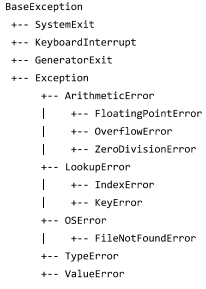

In [ ]:
try:
  with open("not-found-file", "r") as f:
    a = f.readlines()
except Exception:
  print("Exception")

Exception


### 例外の捕捉の順序

try-except文を利用することで複数の例外を捕捉することができる。

例外はexceptで捕捉対象の例外を上から順番に確認して、捕捉条件に当てはまれば捕捉され、それ以降のexceptには捕捉されない。

例えばFileNotFoundErrorで捕捉され、Exceptionでは捕捉されない。

In [ ]:
try:
  with open("not-found-file", "r") as f:
    a = f.readlines()
except FileNotFoundError:
  print("FileNotFoundError")
except Exception:
  print("Exception")

FileNotFoundError


例外の親子関係の性質上、try-exceptで捕捉する例外の順番に注意する必要がある。

悪い例を示す。FileNotFoundErrorとして捕捉したいがExceptionとして捕捉されている。

In [ ]:
try:
  with open("not-found-file", "r") as f:
    a = f.readlines()
except Exception:
  print("Exception")
except FileNotFoundError:
  print("FilNotFounderror")

Exception


例外の捕捉には上記のように上から順番に捕捉がされているという性質から、

親子関係がある場合はより具体的な子クラスの例外から先に記載する必要がある。

In [ ]:
try:
  with open("not-found-file", "r") as f:
    a = f.readlines()
except FileNotFoundError:
  print("FileNotFoundError")
except Exception:
  print("Exception")

FileNotFoundError


### 例外の発生

例外発生時に捕捉することを満出来たが、例外は特定の箇所で発生させることができる。

raise文を利用することでプログラム中の任意の場所で例外を発生させることができる。

In [ ]:
def add(ar):
  if len(ar)!=2:
    raise ValueError("Not two arguments")

  return ar[0] + ar[1]

try:
  add([1])
except ValueError as error:
  print(error)

Not two arguments


## １－３．ユーザ定義例外

プログラム上で新しい例外クラスを作成することで独自のユーザ例外を指定できる。

ユーザ定義例外はExceptionクラスから直接または間接的に派生させて、標準例外の範囲に収まらない例外を定義する

例えば、認証アプリケーションを作成した場合に認証エラーを関数の呼び出し元に伝えるために作成する。

In [ ]:
class User:
  def __init__(self, name):
    self.name = name

class ApplicationAuthError(Exception):
  pass

class ApplicationAuth:
  def auth(self, username, password):
    auth_username ="user01"
    auth_password ="password"

    if username != auth_username or auth_password !=password:
      # ApplicationAuthErrorを発生させて認証に失敗したことを関数の呼び出し元に伝える
      raise ApplicationAuthError("Authentication error")

    return User(username)


a = ApplicationAuth()
try:
  user = a.auth('user01', 'wrong password')
except ApplicationAuthError as ex:
  print(ex)

Authentication error


## 練習問題

### １－１．

以下に定義するvalidation_time_grather_than_equalを作成せよ。

In [ ]:
# ここに関数を記述する
def validation_time_grather_than_equal(times):
  '''unixtimeの大きさを比較する関数

  引数times[0]とtimes[1]の大きさを比較して結果を返す。
  unixtimeとはUTCを基準に、1970年1月1日0時0分0秒から経過秒で表した時間である。

  Args:
    times list[int]:times[0]はstart_time, times[1]はend_time

  Returns:
    True: start_time <= end_timeの場合
    False: start_time > end_timeの場合

  Raises:
    ValueError:配列の要素数が2でない場合
  '''

a = validation_time_grather_than_equal([1598438351, 1598438351])
b = validation_time_grather_than_equal([1590000000, 1598438351])

print("a = "+ str(a))
print("b = "+ str(a))

# ここに例外を捕捉するコードを記載する。
validation_time_grather_than_equal([1598438351])

print("End")

# 出力
# a = True
# b = True
# ValueErrorが発生しました
# End

# ２．パッケージング

Pythonでは作成したプログラムをモジュール、パッケージ、ライブラリといった単位で管理してパッケージングできる。

本章ではモジュール、パッケージ、ライブラリについて紹介する。

## ２－１．モジュール

### モジュールの作成

講座の第三回でmath、statistics、randomなどをモジュールと呼び、import文を利用することで用意されている関数を利用できることを紹介した。

標準モジュールと同世に関数群やクラス群を1つのファイルにまとめてモジュールを作成することができる。

モジュールは「ファイル名.py」として作成する。

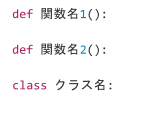

下記に自作もジュールの例を示す。

In [ ]:
# mycalc1.pyとして保存
def add(a, b):
  return a + b

def sub(a, b):
  return a - b

class MyCalc:
  def add(self, a, b):
    return a + b
  def sub(self, a, b):
    return a - b

### モジュールの再利用

自作したモジュールは標準モジュールと同様にimport文を利用することで利用できる。ただし、カレントディレクトリに自作モジュールが存在しないとインポートできない。

In [ ]:
import mycalc1

print(mycalc1.add(1,1))
print(mycalc1.sub(1,1))

my = mycalc1.MyCalc()
print(my.add(1, 1))
print(my.sub(1, 1))


ModuleNotFoundError: ignored

カレントディレクトリにモジュールが存在しなと、インポートできないことを確認する。

下記に確認手順を示す。

(1)インポートしたモジュールをクリアするために「ランタイム」から「ランタイムの再起動」をする。

(2)cdコマンドでディレクトリを移動する。

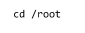

(3)lsコマンドでカレントディレクトリにmycalc1が存在しないことを確認する。

image.png

(4)下記を実行する

In [ ]:
import mycalc1

print(mycalc1.add(1,1))
print(mycalc1.sub(1,1))

my = mycalc1.MyCalc()
print(my.add(1, 1))
print(my.sub(1, 1))


ModuleNotFoundError: ignored

エラーとなることを確認できた。

## ２－２．パッケージ

Pythonでは複数のモジュールをまとめてパッケージとしてまとめて管理できる。

プログラムがある程度の大きさになった場合は、パッケージとして管理すると管理がしやすい。

### パッケージの作成

Pythonでパッケージを作成するには、下記構成でディレクトリとファイルを作成する。

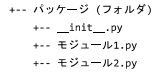

**パッケージ（フォルダ）**

パッケージとなるフォルダ。フォルダ名がパッケージ名となる。

中に__init__.pyとモジュールを格納する。

**モジュール１（2）.py**

パッケージに格納するモジュール群。

**init.py**

パッケージの目印。__init__.pyに書いたコードはパッケージがインポートされると一番初めに実行される。

特に処理がない場合は空ファイルで良い。

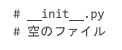

### パッケージの利用

パッケージもモジュールと同様にimport文で読み込むことができる。

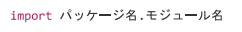

下記の記述でもモジュールを読み込むことができる。

image.png

下記の記述で複数モジュールを読み込むことができる。

image.png

下記の記述でパッケージ下の全てのモジュールを読み込むことができる。

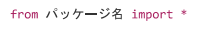

**パッケージ具体例**

モジュールの作成で作成したmycalc.pyを含むパッケージmypacを作成を通してパッケージ化について説明する。

mypacという名前のパッケージを作成する。

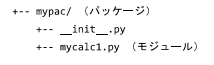

(1)mycalc1.pyがあるディレクトリに移動する

image.png

(2)mycalc1.pyがあるか確認する

image.png

(3)mypacフォルダを生成して、__init__.pyとmycalc1.pyを格納する。

(4)作成したパッケージをインポートしたプログラムを実行する。

In [ ]:
!cd /content

In [ ]:
!ls

mypac  sample_data


In [ ]:
from mypac import mycalc1

print(mycalc1.add(1, 1))
print(mycalc1.sub(1, 1))

my = mycalc1.MyCalc()
print(my.add(1, 1))
print(my.sub(1, 1))

2
0
2
0


[補足]

 - 構成は下図のようにする。

 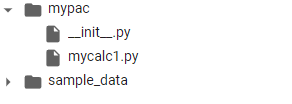

 - mycalc1.pyの中身はこのようにしておく

 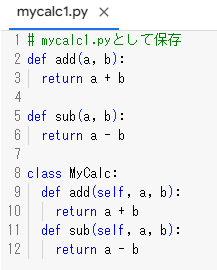

 上記の補足事項を守ることでパッケージ化したモジュールを実行できる。

パッケージからモジュールをインポートして利用することができた。

説明では割愛したが、モジュールと同様カレントディレクトリにパッケージが存在しないとインポートすることができない。

## ２－３．ライブラリ

複数のパッケージをライブラリとしてまとめて管理できる。

プログラムがある程度の大きさになった場合は、ライブラリとして管理すると管理がしやすい。

**ライブラリ管理ツール**

ライブラリの作成ではライブラリ（パッケージ）管理ツールを利用する。

ライブラリ（パッケージ）管理ツールは実行環境によって利用するツールが異なる。

本講座ではGoogleColab上で実行できるサンプルを記載する。

ローカル環境で実行している人は下記読み替えをすること。

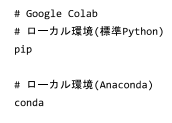

### ライブラリの作成

Pythonでライブラリを作成する場合は、下記のような構成でディレクトリとファイルを作成する。

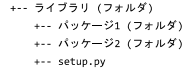

**ライブラリ（フォルダ）**

ライブラリ作成のルートとなるフォルダ。

中にパッケージとsetup.pyを格納する。

**パッケージ1/2**

パッケージのディレクトリ構成で作成したパッケージ。

**setup**

Pythonのプログラム一式をライブラリとしてまとめるためのスクリプト。

下記は最低限の構成である。

nameにはライブラリの名前、

versionにはライブラリのバージョン、

packagesにはライブラリに含めるパッケージを指定する。

### ライブラリのインストール

setup.pyがあるディレクトリに移動して pip installを実行することでライブラリをインストールすることができる。

ライブラリをインストールすることでカレントディレクトリにパッケージがない場合でもパッケージを利用することができるようになる。

**ライブラリ具体例**


**作成**

パッケージ具体例で作成した、mypacを含むライブラリmylibの作成を通してライブラリ化について説明する。

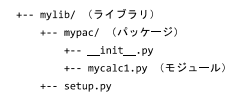

(1)mypacがあるディレクトリに移動する。

image.png

(2)mypacがあるか確認する。

image.png

(3)mylibフォルダを作成する。

(4)setup.pyを作成してmylibの中に入れる。

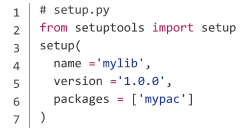

(5)mypacをmylibの中に入れる。

mypacをmylibフォルダに入れるにはmypacをmylibにドラッグ＆ドロップする。

In [ ]:
!cd /content

In [ ]:
!ls

mypac  sample_data


[補足]

 - 最終的なフォルダ構成は下図のようになる。

※mypacフォルダとsetup.pyフォルダはmylibフォルダの直下にあること。

 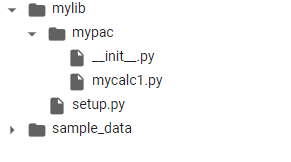

 - setup.pyの中身はこのようになる

 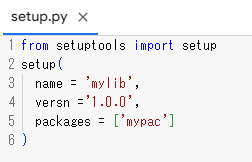

**インストール**

(1)setup.pyがあるディレクトリに移動する

image.png

(2)setup.pyがあることを確認する。

image.png

(3)インストールする。

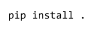

In [ ]:
%cd /content/mylib

/content/mylib


In [ ]:
!ls

mypac  setup.py


In [ ]:
!pip install .

Processing /content/mylib
  Preparing metadata (setup.py) ... done
  Created wheel for mylib: filename=mylib-0.0.0-py3-none-any.whl size=1334 sha256=eaa89b97ab36b68189ec0b46dea793075c558f7b621237b3ce5559cd5ccbbd89
  Stored in directory: /tmp/pip-ephem-wheel-cache-ga1yfts4/wheels/c6/8f/e5/3412d17a830642aea6e90d7b9c68236d328aa5d17cc9d52822
Successfully built mylib


下図のエラーが出ることがある。

その際は(4)を実行する。

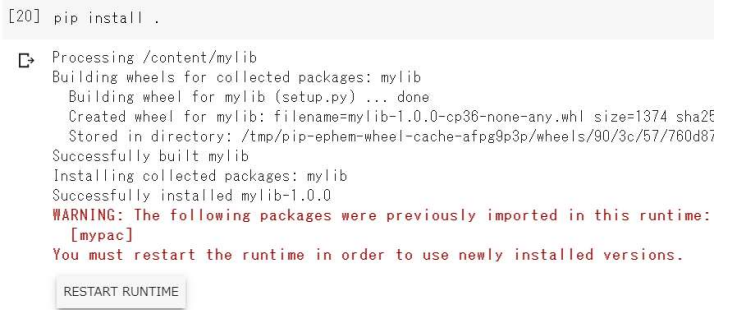

(4)ラインタイムの再起動をする。

既にmypacがインポートされている場合は、ランタイムを再起動しないと利用できないため、ランタイムを再起動する。

(5)インストールされたことを確認する。

image.png

In [ ]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.5
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
annotated-types==0.5.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.4.1
arviz==0.15.1
astropy==5.3.2
astunparse==1.6.3
async-timeout==4.0.3
attrs==23.1.0
audioread==3.0.0
autograd==1.6.2
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blinker==1.4
blis==0.7.10
blosc2==2.0.0
bokeh==3.2.2
branca==0.6.0
build==0.10.0
CacheControl==0.13.1
cachetools==5.3.1
catalogue==2.0.9
certifi==2023.7.22
cffi==1.15.1
chardet==5.2.0
charset-normalizer==3.2.0
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.1.1
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.0
convertdate==2.4.0
cryptography==41.0.3
cufflinks==0.17.3
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.11.0
cymem==2.0.7
Cython==0.29.36
dask==2023.8.1
datascience==0

下記のように出力される。

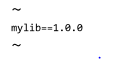

**インストールの確認**

(1) /rootディレクトリに移動する。

mypacがあるディレクトリで実行してもインストールの確認ができないため、mypacがないディレクトリに移動後に確認する。

image.png

(2)mypacがないことを確認する

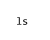

(3)パッケージのインポートを含むプログラムを実行する。

In [ ]:
%cd /root

/root


In [ ]:
!ls

In [ ]:
from mypac import mycalc1

print(mycalc1.add(1, 1))
print(mycalc1.sub(1, 1))

my = mycalc1.MyCalc()
print(my.add(1, 1))
print(my.sub(1, 1))

2
0
2
0


カレントディレクトリにmypacパッケージが存在しなくてもインポートできることが確認できる。

## 練習問題

## ２－１．

以下仕様のパッケージを作成して、すべての関数が動作することを確認せよ。

**パッケージ構成**

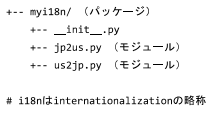

**モジュール仕様**

In [ ]:
# jp2us.py
def change_money(money):
  '''円をドルに変換する関数
  1ドル120円換算で変換する。

  Args:
    money float:  円
  Returns:
    float:  ドル
  '''


def change_weight(weight):
  '''グラムをポンドに変換する関数
  1ポンド453.59237グラムで変換する。

  Args:
    weight float: グラム
  Returns:
    float:  ポンド
  '''

In [ ]:
# us2jp.py
def change_money(money):
  '''ドルを円に変換する関数
  1ドル120円換算で変換する。

  Args:
    money float:  ドル
  Returns:
    float:  円
  '''


def change_weight(weight):
  '''ポンドをグラムに変換する関数
  1ポンド453.59237グラムで変換する。

  Args:
    weight float: ポンド
  Returns:
    float:  グラム
  '''

**注意点**

実行前にカレントディレクトリにmyi18nパッケージが存在することを確認する。

存在しない場合はcdを利用してmyi18nパッケージが存在するディレクトリで実行する。

ファイルを書き換えた場合はランタイムを再起動する。

**動作確認**

下記スクリプトを動作確認に利用する。

In [ ]:
from myi18n import us2jp, jp2us

a = us2jp.change_money(1)
print("us2jp.change_money: "+str(a))

a = us2jp.change_weight(1)
print("us2jp.change_weight: "+str(a))

a = jp2us.change_money(1)
print("jp2us.change_money: "+str(a))

a = jp2us.change_weight(1)
print("jp2us.change_weight: "+str(a))


# 出力
# us2jp.change_money: 120.0
# us2jp.change_weight: 453.59237
# jp2us.change_money: 1.0
# jp2us.change_weight: 1.0

# ３．ユニットテスト

Pythonでは関数やメソッド（ユニット）のテストをプログラムで記載することで、関数の動作をチェックすることができる。

本章ではユニットテストの方法について紹介する。

## ３－１．ユニットテストの方法

ユニットテストは単一モジュールに対して行う方法と、パッケージ全体に対して実施する方法がある。

本章では単一モジュールにユニットテストを取り扱い、パッケージ全体のテスト方法は紹介までとする。

## ３－２．単一モジュールのユニットテスト

下記のモジュールに対してユニットテストをする。

In [ ]:
def add(a, b):
  return a + b

モジュール内にunittest.TestCaseを継承したクラスを定義して、

関数にテストケースを記載していく。

In [ ]:
# module.py
import unittest

def add(a,b):
  return a + b

class ModuleTest(unittest.TestCase):
  def test_add_01(self):
    self.assertEqual(10, add(6, 4))

  def test_add_02(self):
    self.assertEqual(11, add(6, 5))

  def test_add__fail_01(self):
    self.assertEqual(0, add(6, 4))

  def test_add_fail_02(self):
    self.assertEqual(0, add(6, 4))

if __name__=='__main__':
  unittest.main()


Colab上での確認は!python module.pyと実行する。

[補足]

- ライブラリの構成は下図のようになる。

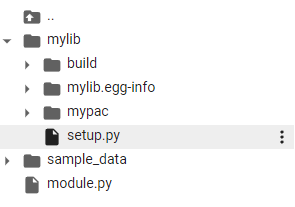

- module.pyの中身は下図のようになっている。

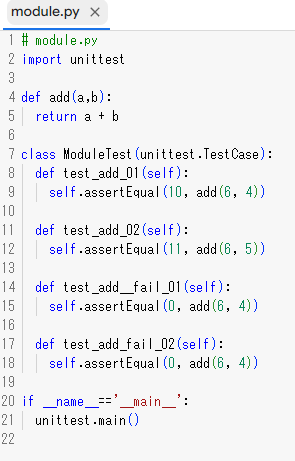

In [ ]:
%cd /content

/content


In [ ]:
!ls

module.py  mylib  sample_data


In [ ]:
!python module.py

..FF
FAIL: test_add__fail_01 (__main__.ModuleTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/module.py", line 15, in test_add__fail_01
    self.assertEqual(0, add(6, 4))
AssertionError: 0 != 10

FAIL: test_add_fail_02 (__main__.ModuleTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/module.py", line 18, in test_add_fail_02
    self.assertEqual(0, add(6, 4))
AssertionError: 0 != 10

----------------------------------------------------------------------
Ran 4 tests in 0.001s

FAILED (failures=2)


**unittestパッケージのインポート**

2行目：ユニットテストをする場合はunittestパッケージをインポートする。

### ユニットテスト作成

7-18行目、ユニットテストをするクラスを定義して内部にテストを記載していく。

テストにはassert○○メソッドを利用する。

assert○○メソッドの利用方法は後に記載する。

### 実行

20-21行目、pythonでファイルを実行した場合にunittest.min()が実行され、ユニットテストが実行される。

### テスト結果

1行目以降に関数ごとのテスト結果が表示される。

.は合格、Fは不合格を示す。

### 不合格のテスト一覧

2行目以降に不合格のテスト結果が表示される。

## ３－３．assert○○メソッド

Pythonでユニットテストをする際はassertと呼ばれる条件をテストするためのメソッドを使う。

ここでは代表的なメソッドを紹介する。

### assertEqual(a, b), assertNotEqual(a, b)

assertEqual(a, b)は第一引数(a)と第二引数(b)が同じだった場合は合格、そうでない場合は不合格となる。

assertNotEqual(a, b)は第一引数(a)と第二引数(b)が異なる場合は合格、そうでない場合は不合格となる、

In [ ]:
# module.py
import unittest

def add(a,b):
  return a + b

def change_money_jp2us(ar_money):
  re_money = []
  for money in ar_money:
    re_money.append(money / 120)
  return re_money

class TestSample(unittest.TestCase):
  def test_add_01(self):
    self.assertEqual(10, add(6, 4))

  def test_add_02(self):
    self.assertNotEqual(11, add(6, 4))

  def test_is_change_money_01(self):
    self.assertEqual([1, 2], change_money_jp2us([120, 240]))

  def test_is_change_money_02(self):
    self.assertNotEqual([0, 0], change_money_jp2us([120, 240]))

if __name__=='__main__':
  unittest.main()


In [ ]:
!python module.py

....
----------------------------------------------------------------------
Ran 4 tests in 0.000s

OK


### assertTrue(x), assertFalse(x)

assertTrue(x)は第一引数(x)がTrueの場合は合格、そうでない場合は不合格となる。

assertFalse(x)は第一引数(x)がFalseの場合は合格、そうでない場合は不合格となる。

In [ ]:
# module.py
import unittest

def is_under30(a):
  return a<30

class TestSample(unittest.TestCase):
  def test_is_under30_1(self):
    self.assertTrue(is_under30(29))

  def test_is_under30_2(self):
    self.assertFalse(is_under30(30))

if __name__ =='__main__':
  unittest.main()

In [ ]:
!python module.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.012s

OK


### assertGreaterEqual(a, b), assertLess(a, b)

assertGreaterEqual(a, b)は第一引数(a)が第二引数(b)以上の場合は合格、そうでない場合は不合格となる。

assertLess(a, b)は第一引数(a)が第二引数(b)未満の場合は合格、そうでない場合は不合格となる。

In [ ]:
# module.py
import unittest

def ten():
  return 10

class TestSample(unittest.TestCase):
  def test_ten_1(self):
    self.assertGreaterEqual(10, ten())

  def test_ten_2(self):
    self.assertLess(9, ten())

if __name__=='__main__':
  unittest.main()

In [ ]:
!python module.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.000s

OK


### assertIn(a, b), assertNotin(a, b)

assertIn(a, b)は第一引数(a)が第二引数(b)に含まれている場合は合格、そうでない場合は不合格となる、

assertNotIn(a, b)は第一引数(a)が第二引数(b)に含まれていない場合は合格、そうでない場合は不合格となる。

In [ ]:
# module.py
import unittest

def abc():
  return ['a', 'b', 'c']

class TestSample(unittest.TestCase):
  def test_abc_1(self):
    self.assertIn('a', abc())

  def test_abc_2(self):
    self.assertNotIn(1, abc())

if __name__ == '__main__':
  unittest.main()

In [ ]:
!python module.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.000s

OK


### assertRaises (exception, callable, args)

assertRaises(exceptio, callable, args)は例外発生のテストをする。

第一引数(exception)の例外が第二引数の(callable)の引数に第三引数のargsで実行した場合に第一引数(excetion)が発生する場合は合格、そうでない場合は不合格となる。

In [ ]:
# module.py
import unittest

def add(ar):
  raise ValueError("raise ValueError")

class TestSample(unittest.TestCase):
  def test_add_1(self):
    self.assertRaises(ValueError, add, ([1, 2]))


if __name__=='__main__':
  unittest.main()

In [ ]:
!python module.py

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


## 練習問題

### ３－１．

以下の関数に対してテストケースを作成して実行せよ

In [ ]:
def add(ar):
  """二つの値の足し算をする関数

  ar[0]とar[1]の足し算の結果を返す。

  Args:
    ar(list[int]):  ar[0]とar[1]に計算の値
  Return:
    int:  足し算結果

  Raises:
    ValueError: arの要素が2つでない場合
  """

  if len(ar)!=2:
    raise ValueError("引数arの要素数が2つではありません。")

  return ar[0] + ar[1]

# ４．簡潔な繰り返し表現

Pythonではfor文を用いた処理を簡潔に記述できる組み込み関数や内包表記という仕組みが用意されている。本章ではそれらについて紹介する。

組み込み関数や内包表記では井寺ブルやイテレータオブジェクトを扱うが、詳細はコラムに記載する。

文字列、リスト、タプル、集合、辞書などのオブジェクトがこれにあたる。

##４－１．イテラブルを扱う組み込み関数

for文を用いた処理を簡素に記述できる組み込み関数のmapとfilterを消化する。

### map

mapはすべてのイテラブルな要素に関数を適用して返却する。

下記のように利用する。

image.png

In [ ]:
x = [10.5, 20.3, 30.4]

print(x)

# list関数にmapオブジェクトを渡すことでlistに変換する
y = list(map(round, x))
print(y)

[10.5, 20.3, 30.4]
[10, 20, 30]


自作関数を指定することも可能である。

In [ ]:
x = [10.5, 20.3, 30.4]

def double(x):
  return x*2

print(x)

# list関数にmapオブジェクトを渡すことでlistに変換する
y = list(map(double, x))
print(y)

[10.5, 20.3, 30.4]
[21.0, 40.6, 60.8]


### filter

filterはイテラブルな要素に関数を適用し、結果がTrueとなる要素を抽出して返す。

下記のように利用する。

image.png

In [ ]:
def is_under30(val):
  return val<30

x = [10.5, 20.3, 30.4]
print(x)

# list関数にイテレータを渡すことでlistに変換する
y = list(filter(is_under30, x))
print(y)

[10.5, 20.3, 30.4]
[10.5, 20.3]


### lambda式

lambda式と呼ばれる無名関数を紹介する。

無名関数はその名の通り、名前付けのない関数である。

一時的に関数を定義する場合などに利用する。

image.png

先ほどのmapとfilterの例をlambdaを用いて書き換えると下記のように記載することができ、より簡潔に記載ができる。

In [ ]:
x = [10.5, 20.3, 30.4]
print(x)

# xの要素を2倍にした値を返すlambdaを定義
y = list(map(lambda a: a*2, x))
print(y)

# xの要素が30未満の場合、Trueを返すlambdaを定義
y = list(filter(lambda a:a<30, x))
print(y)

[10.5, 20.3, 30.4]
[21.0, 40.6, 60.8]
[10.5, 20.3]


## ４－２．内包表記

for文を用いた処理を簡潔に記述できる内包表記を紹介する。

内包表記はリストや集合、辞書などを生成できる特別な構文である。

ここでは一部の例を紹介する。

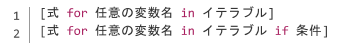

In [ ]:
x = [10.5, 20.3, 30.4]
print(x)

# xの要素を2倍にした値を返す内包表記
y = [a*2 for a in x]
print(y)

# xの要素が30未満の要素を返す内包表記
y = [a for a in x if a<30]
print(y)

[10.5, 20.3, 30.4]
[21.0, 40.6, 60.8]
[10.5, 20.3]


## 練習問題

### ４－１．

次のfor文をmapとlambda式を利用したパターンと、内包表記を利用したパターンで書き換えなさい。

In [ ]:
x = [1, 2, 3, 4, 5]

y = []
for a in x:
  y.append(a*10)

print(y)

[10, 20, 30, 40, 50]


In [ ]:
x = [1, 2, 3, 4, 5]

y = # ここにmapを利用した回答を記載
print(y)

y = # ここに内包表記を利用した回答を記載
print(y)

### ４－２．

次のfor文をfilterとlambda式を利用したパターンと内包表記を利用したパターンで書き換えなさい。

In [ ]:
x =[1, 2, 3, 4, 5]

y = []
for a in x:
  if a%2==0:
    y.append(a)

print(y)

[2, 4]


In [ ]:
x = [1, 2, 3, 4, 5]

y = # ここにfilterを利用した回答を記載
print(y)

y = # ここに内包表記を利用した回答を記載
print(y)

# ５．課題

[課題提出時の注意点]

課題を提出する場合は、作成したモジュールの内容をコードセルに張り付けて保存してから提出すること。

※「.ipynbをダウンロード」すると作成したファイルは削除されるため。

## 課題１．

下記条件で、下記仕様の単一モジュールを作成して、作成したモジュールのテストを実施せよ。

[条件]

(1)square2関数はmap, filter, 内包表記のいずれかを利用して作成すること。

In [ ]:
# mymath.py
import unittest

def square2(x):
  """配列の値を2乗する関数

  すべての値を2乗する。

  Args:
    x (list[int]):  数字の配列
  Return:
    list[int]:  引数xを2乗した配列
  Raises:
    ValueError: 引数xの要素数が0の場合
  """

class ModuleTest(unittest.TestCase):
  # ここにテストケースを記載する


if __name__=='__main__':
  unittest.main()

## 課題2.

下記に定義するEmployeeクラスのインスタンスを要素とするリストに対し、各インスタンスが持つインスタンス変数nameの頭文字とageを結合するプログラムを作成せよ。

ただし下記の条件を設ける。

[条件]

(1) employee.pyを利用すること。

(2) map, filter, 内包表記のいずれかを利用して表示文字列の配列を作成すること。

In [ ]:
# employee.py
class Employee():
  """従業員クラス

  従業員を表したクラス

  Attributes:
    name(str):  名前
    age(int) :  年齢
  """

  def __init__(self, name, age):
    self.name = name
    self.age = age

In [ ]:
import employee.Employee as Employee

emps = []
emps.append(Employee('Taro', 20))
emps.append(Employee('Jiro', 23))
emps.append(Employee('Hanako', 23))

# ここに記載
y = # empsにある各従業員の名前の頭文字と年齢を結合した配列
print(y)

# 出力
# ['T20', 'J23', 'H23']

# ６．コラム

## ６－１．DocString

本章ではプログラム中にクラスや関数の仕様について記載するDocStringについて説明する。

関数やクラスの仕様についてプログラム内に記載しておくことで、後で自動的にHTMLを生成して仕様の一覧を表示することができる。

### スタイル

DocStringにはreStructuredText, Google style, Numpy styleなど様々なドキュメントスタイルが存在している。

本講座ではほかのスタイルと比較すると短くてシンプルに書けるGoogle styleを紹介する。

### 記載内容

モジュール、クラス、関数についての下記のように記載をしていく。

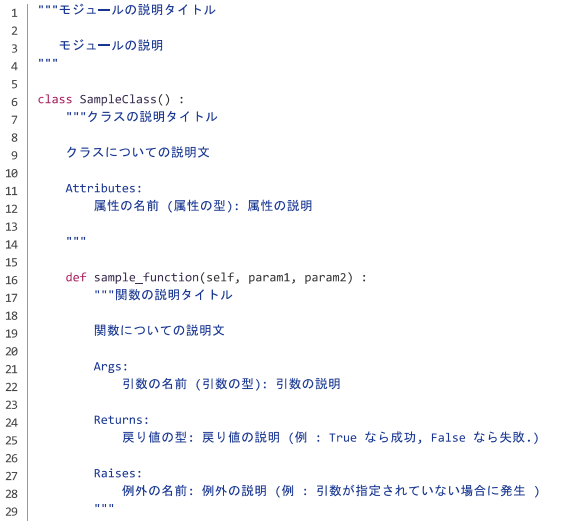

## ６－２．ライブラリの確認

GoogleColabの実行環境であらかじめインストールされているライブラリの確認方法を記載する。

pip freeze コマンドを利用すると確認できる。

In [ ]:
!pip freeze

実行するとライブラリ名==バージョン名としてライブラリの一覧が表示される。

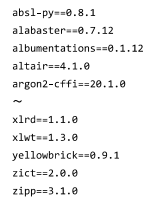

Google Colabではこのようにたくさんのライブラリが標準で利用できるようになっている。

今後利用する機械学習のライブラリも標準でインストールされている。

一部を紹介する。

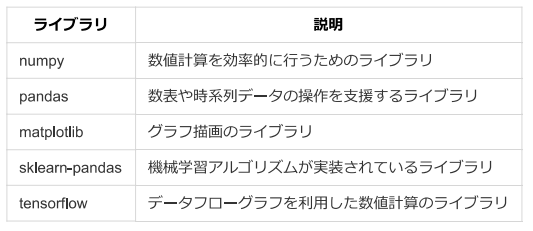

## ６－３．ライブラリのインストール

ライブラリはインターネット上にあるPyPI(The Python Package Index)に公開されており、 pip install ライブラリ名とすることでインストールできる。

ライブラリをインストールすればライブラリ内のパッケージを利用することができる。

pip install ライブラリ名

PyPIで公開されているライブラリからsimplejsonをインストールして利用する。

なおsimplejsonはwebなどで利用されるjsonと呼ばれるデータ形式をPythonのデータ構造に変換するライブラリである。

In [ ]:
!pip install simplejson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 2.5 MB/s eta 0:00:00


インストールされたことを確認する。

In [ ]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.5
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
annotated-types==0.5.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.4.1
arviz==0.15.1
astropy==5.3.2
astunparse==1.6.3
async-timeout==4.0.3
attrs==23.1.0
audioread==3.0.0
autograd==1.6.2
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blinker==1.4
blis==0.7.10
blosc2==2.0.0
bokeh==3.2.2
branca==0.6.0
build==0.10.0
CacheControl==0.13.1
cachetools==5.3.1
catalogue==2.0.9
certifi==2023.7.22
cffi==1.15.1
chardet==5.2.0
charset-normalizer==3.2.0
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.1.1
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.0
convertdate==2.4.0
cryptography==41.0.3
cufflinks==0.17.3
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.11.0
cymem==2.0.7
Cython==0.29.36
dask==2023.8.1
datascience==0

下記のように出力される。

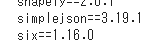

インストールしたライブラリsimplejson内のパッケージsimplejsonの利用例を示す。

In [ ]:
import simplejson

d = {
    "c": 0,
    "b": 0,
    "a": True
}

print(d)

# dをjson形式の文字列に変換して表示する
print(simplejson.dumps(d))

{'c': 0, 'b': 0, 'a': True}
{"c": 0, "b": 0, "a": true}


## ６－４．パッケージのユニットテスト

### ディレクトリ構成

パッケージに対してユニットテストを実施する場合、下記のようにライブラリにtestsディレクトリを追加して、test_モジュール名.pyのようにモジュール事にテストファイルを作成する。

テストファイルの中に単一モジュールで記載したのと同様にunittest.TestCaseを継承したクラスを定義して、関数にテストケースを記載していく。

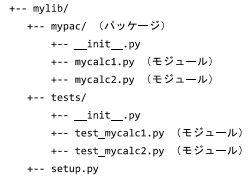

### 実行

testsディレクトリ下の全てのテストを実行するには

setup.pyと同じディレクトリに移動して、

python -m unittest を実行する

In [ ]:
%cd mylib
!python -m unittest

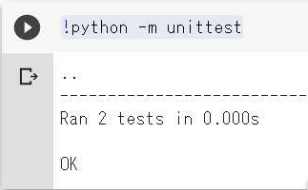

テストが不合格の場合は、単一モジュールの時と同様に表示がされる。

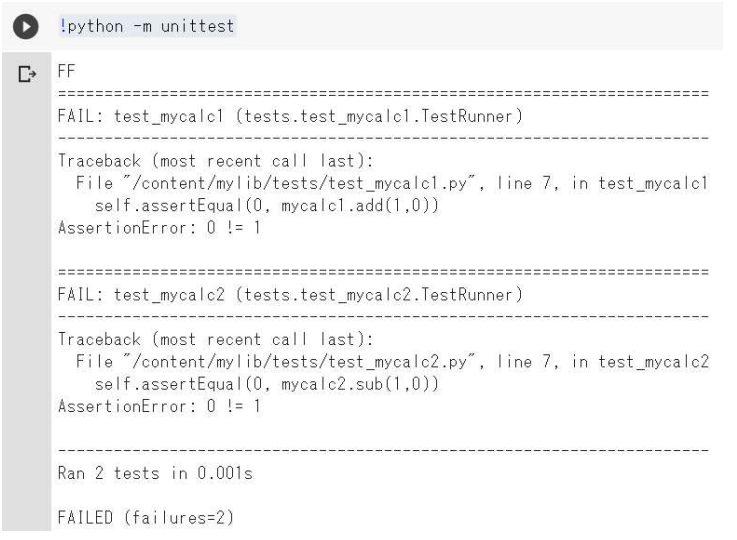

## ６－５．イテラブルなオブジェクト

__iter__()を持つオブジェクトのことをイテラブルなオブジェクト（以下イテラブルと略す）と呼び、

組み込み関数や内包表記で利用する。

今までに扱った例だと、listやsetがイテラブルである。

イテラブルはfor a in xのxに指定してaで要素を受け取れるように、

要素を順番に取り出すことが出来る。

### 要素を順番に取り出す仕組み

for a in xを例にどのような仕組みで要素を順番に取り出しているか説明する。

(1)for文はイテラブルの__iter__()を呼出しイテレータと呼ばれるオブジェクトを取得する。

(2)イテレータは次に呼び出す要素を__next__()に実装しており、for文は繰り返しの度にイテレータの__next__()を呼び出し、次の要素を取り出す。

(3)__next__()は返す要素が無い場合は、StopIterationを返し、処理を終了する。

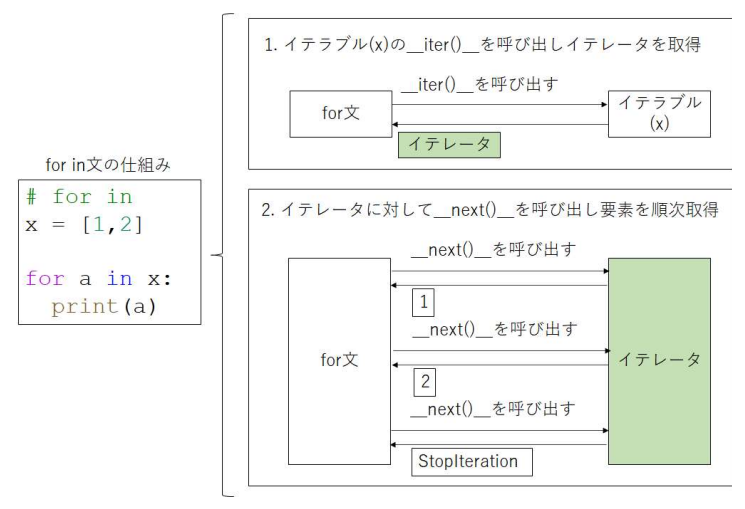

### 実装例

イテラブルとイテレータについて実装例を紹介する。

CountDownがイテラブルでMyIteratorをイテレータとして持つ。

CountDownをfor文に渡した場合の出力を確認する。

In [ ]:
class MyIterator:
  def __init__(self, v):
    self.value = v

  def __next__(self):
    self.value -= 1
    if self.value < 0:
      # StopIterationを返すと終了
      raise StopIteration
    return self.value

# __iter__()を持つクラス
class CountDown:
  def __init__(self, v):
    self.value = v

  def __iter__(self):
    return MyIterator(self.value)

e = CountDown(10)
# イテラブルなeをfor文に渡す
for i in e:
  print(i)

9
8
7
6
5
4
3
2
1
0
